SENTİMENT ANALYSİS

In [1]:
# Düz bir metin deposundan duygu analizi yapmak için ikili sınıflandırma yapılacak
# Datasets : IMDB

In [1]:
# IMPORTING LIBRARIES
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf


from tensorflow.keras import layers
from tensorflow.keras import losses

In [3]:
# fFilm eleştiri metinlerine göre olumlu yada olumsuz olarak sınıflandırılacak
# IMDB 50000 film incelemesinin metnini içeren Large Movie Review Dataset kullanılacak
# Train_Set = 25000-------------- Test_Set = 25000 /// Olumlu olumsuz yorumlar dengeli bir şekilde dağılmıştır

In [2]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file("aclImdb_v1", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

In [3]:
os.listdir(dataset_dir)

['imdb.vocab', 'README', 'test', 'imdbEr.txt', 'train']

In [4]:
# Train klasörünü oluşturalım

train_dir = os.path.join(dataset_dir,"train")
os.listdir(train_dir)

['unsup',
 'neg',
 'urls_pos.txt',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_unsup.txt',
 'labeledBow.feat',
 'pos']

In [53]:
# Train klasöründeki pos ve neg klasörleri olumlu ve olumsuz metinleri içerir
# Birini inceleyelim

sample_file = os.path.join(train_dir,"pos/1181_9.txt")
with open(sample_file) as f:
  print(f.read())

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


In [5]:
# Verileri diskten yükleyelim ve uygun bir formata çevireceğiz
# Hazırlayacağımız format tf.keras.preprocessing içerisinde yer alan text_dataset_form_directory için olacak
# İki sınıftan oluşacak class_a ve class_b şeklinde tabiki bu uygulamamız için train klasörünün içerisindeki "pos" ve "neg" sınıfları olarak ayarlayacaz
# Bu iki sınıftan hariç diğer dosyaları kaldıracaz

remove_dir = os.path.join(train_dir,"unsup")
shutil.rmtree(remove_dir)

In [6]:
#Veri kümesini 3 bölüme ayırmamız gerekiyor train-test-validation
#Zaten veri train ve test içeriyor
#egitim veri setini 80-20 olarak bölelim


batch_size =32
seed =42
raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size = batch_size,
    validation_split = 0.2,
    subset = "training",
    seed = seed
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [56]:
# Veri setini inceleyelim
for text_batch,label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review" , text_batch.numpy()[i])
    print("Label" , label_batch.numpy()[i])

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [7]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/train',
    batch_size = batch_size,
    validation_split = 0.2,
    subset = "validation",
    seed = seed
)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [58]:
for review_batch_val,label_batch_val in raw_val_ds.take(1):
  for i in range(3):
    print("review batch val" , review_batch_val.numpy()[i])
    print("Label Batch Val" , label_batch_val.numpy()[i])


review batch val b'a friend gave it to me saying it was another classic like "Debbie does Dallas". Nowhere close. I think my main complaint is about the most unattractive lead actress in porn industry ever. Even more terrible is that she is on screen virtually all the time. But I read somewhere that back in those days, porn had to have some "artistic" value. I was unable to find it though. See it only if you are interested in history of development of porn into mainstream, or can appreciate art in porn movies. I know I am not. But the director of the movie appears to be a talented person. He even tried to get Simon & Garfunkel to give him permissions to use his songs. Of course, they rejected.'
Label Batch Val 0
review batch val b"The scenes are fast-paced. the characters are great. I love Anne-Marie Johnson's acting. I really like the ending. <br /><br />However, I was disappointed that this movie didn't delve deeper into Achilles's and Athena's relationship. It only blossomed when th

In [8]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
        'aclImdb/test',
        batch_size = batch_size

)

Found 25000 files belonging to 2 classes.


In [60]:
for review_batch_test , label_test in raw_test_ds.take(1):
  for i in range(3):
    print("Review Test Batch" , review_batch_test.numpy()[i])
    print("Label Test Batch" , label_test.numpy()[i])

Review Test Batch b'As long as you keep in mind that the production of this movie was a copyright ploy, and not intended as a serious release, it is actually surprising how not absolutely horrible it is. I even liked the theme music.<br /><br />And if ever a flick cried out for a treatment by Joel (or Mike) and the MST3K Bots, this is it! Watch this with a bunch of smart-ass wise-crackers, and you\'re in for a good time. Have a brew, butter up some large pretzels, and enjoy.<br /><br />Of course, obtaining a copy requires buying a bootleg or downloading it as shareware, but if you\'re here on the IMDb, then you\'re most likely savvy enough to do so. Good luck.<br /><br />And look for my favorite part....where Dr. Doom informs the FF that they have 12 hours to comply with his wishes....and he actually gestures the number "12" with his finger while doing so....it\'s like "Evil Sesame Street"....hoo boy.<br /><br />...and of course Mrs. Storm declaring "Just look at you....the Fanstastic 

In [15]:
#Veri Kümesini Eğitim İçin Hazirlama
#1- Standardizasyon : Genellikle verileri basitlestirnek ve noktalama işaretleri yada html öğelerini kaldırmak için metnin ön işlenmesidir.
#2-Belirteçleme (Tokenization): Dizeleri bölme anlamına gelir
#3-Vectorleştirme : Tokenların bir sinir ağını beslemek için sayılara dönüştürülmesini ifade eder

# ----> Veriler incelendiğinde <br/> gibi html ifadeleri bulunuyor.Bu ifadeler textvectorization tarafından kaldırılamaz.
# TextVectorization işlemi noktalama işaretlerini kaldırır yada harflerin hepsini küçük harfe dönüştürür
# Bu yüzden özel <br/> yi kaldırmak için özel kod düzenlememiz gerekecek


#  Not: Eğitim-test çarpıklığını önlemek için (eğitim-hizmet eğriliği olarak da bilinir), veriyi tren ve test zamanında aynı şekilde önceden işlemek önemlidir.
# Bunu kolaylaştırmak için, bu öğreticide daha sonra gösterildiği gibi, TextVectorization katmanı doğrudan modelinizin içine dahil edilebilir.

In [9]:
def custom_standardization(input_data):  # fonsiyonu tanımladık
  lowercase = tf.strings.lower(input_data)  # Metni küçük harfe çevirdik
  stripped_html = tf.strings.regex_replace(lowercase, '<br />',' ' ) # Metnin sonunda bulunan <br /> ifadelerini " " boşlukla değiştiriyoruz
  return tf.strings.regex_replace(stripped_html,
                                 "[%s]" % re.escape(string.punctuation),'')

  # tf.string.regex_replace değiştirmek için kullandık
  # re.escape kaçış ifadelerini ekleme işini yapar "\" sebebi noktalama işaretlerinin içerisinde örneğin "." ifadesini "\." ya çevirir
   # string.punctuation içerinde noktalama işaretleri barındırır
   # "[s]" yer tutucusu çnlerinde kaçış ifadeleri yer alan noktalama işaretlerin yerini tutar ve sonuç olarak tespit edilen noktalama işateleri boşluğa dönüştürürlür

In [10]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [11]:
#Vectorization işlemi

max_features = 10000 # en sık kullanılan kelime sayısı
sequence_length = 250 # maç kelime uzunluğu

vectorize_layer = layers.TextVectorization(   # TextVectorization katmanı oluşturup parametrelerini gireceğiz
                                           standardize = custom_standardization, # Bir üst satırda tanımlamış olduğumuz standardizasyon kodu(metni kğçük harf yapar-html etiketlerini temizler-noktalama işaretlerini kaldırır)
                                           max_tokens = max_features ,# en sık geçen 10000 kelimeyi dikkate alır
                                              output_mode = "int", # Vectorization sonucunda her bir kelimeye int cinsinden bir değer atar.Bu değer kelimelerin indexlerini temsil eder
                                              output_sequence_length = sequence_length # Her bir çıktının aynı uzunlukta olmasını sağlar.250 değeri olarak belirlenen değerden küçükse doldurulur,fazlaysa kesilir
                                           )

In [12]:
# Verimizde cümle ve etiketi birlikte bulunuyor öncelikle sadece metin dosyalarını bir değişkene tanımlayacağız
train_text = raw_train_ds.map(lambda x,y:x) # Bu satır sadece metin dosyalarını train_text değişkenine atar.ÖRneğin:[("Bugün hava çok güzel",1),("Hava yağışlu olacak",1)] verilerini ["Bugün hava çok güzel","Hava yağışlı olacak"] tipine dönüştürür

# Metinlerdeki en çok kullanılan kelimelere dikkat ederek sayısal verilere dönüştürelim
# Bunun için adapt fonksiyonunu kullanıyoruz

vectorize_layer.adapt(train_text)
# adapt fonksiyonu metinleri işleyerek belirlediğimiz parametrelere uygun olarak metinleri indexleme işlemi yapar

# Örnek olarak train_text =["Selam Arkadaşlar","Arkadaşlarlar hoşgeldiniz","Selam hoşgeldiniz"] verileri olsun
# Yapacağı işlem "Selam" ---> 1 ,"Arkadaşlar"---->2 , "hoşgeldiniz" ---->3 şeklinde tanımlar
# ["Arkadaşlar Selam"] ----- [2,1] şeklinde çıktı almamızı sağlar

In [13]:
# Bunun nasıl çalıştığını anlamak için veri üzerinde gösterelim
def vectorize_text(text,label): # text ve label paramtresi alan fonksiyonu tanımladık
  text = tf.expand_dims(text,-1)  # Tensore yeni bir boyut ekledik.TextVectorizationda verilerin işlenmesi için 2 boyulu hale getiriyoruz
  return vectorize_layer(text),label # Metni vectorize ediyoruz yani en sık kullanılan kelimeleri indexleme işlemi yapıyoruz.Label için işlem yapmıyoruz orjinal(0-1) şeklinde kalıyor

# Not: "expand_dim" TextVectorization katmanının giriş formatı iki boyutlu dizi alacağı için tek boyutlu metin verilerimizi iki boyutlu hale getirmemiz gerekiyor
# tf.expand_dims çalışma mantığı ----> tf.expand_dims(tensor,axis)---tf.expand_dims(text,-1) text değişkeninin sonuna(-1 sonunu ifade eder,-2 sondan 2.boyut) boyut ekleme işlemi yapar
# Örneğin; text = ["Selam Nasılsın","Merhaba Adanalı"] bu tek boyutlu bir değişken olup text.shape = (2,) dir.
# tf.expand_dims(text,-1) uygulandıktan sonra [["Selam Nasılsın"],["Merhaba Adanalı"]] ---> text.shape = (2,1) haline gelir.Yani 2 satır ve 1 sütundan oluşan bir matris gibi düşünelim


In [66]:
text_batch,label_batch = next(iter(raw_train_ds)) # iter fonksiyonu raw_train_ds içerisinde bir döngü oluşturur.(next) bir sonraki sıradaki döngüye geçirir/text_batch ve label_batch değişkenine sırayla atanırlar
first_review , first_label = text_batch[0],label_batch[0] # Bu verimiz için ilk eleştiri yazısını ve onun olumlu yada olumsuz olmasını belirten etikeni tanımlar
print("Review" , first_review)
print("Label",raw_train_ds.class_names[first_label])
print("Vectorized Review" , vectorize_text(first_review,first_label))

Review tf.Tensor(b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.', shape=(), dtype=string)
Label neg
Vectorized Review (<tf.Tensor: shape=(1, 250), dtype=int64, numpy=
array([[  86,   17,  260,    2,  222,    1,  571,   31,  229,   11, 2418,
           1,   51,   22,   25,  404,  251,   12,  306,  282,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
       

get_vocabulary() kullanarak tam sayilarin hangi kelimeyi temsil ettigini gorelim

In [67]:
print('8555------>', vectorize_layer.get_vocabulary()[8555])
print('4619------>',vectorize_layer.get_vocabulary()[4619])
print('2-------->',vectorize_layer.get_vocabulary()[2])
print('vocabulary Size {}'.format(len(vectorize_layer.get_vocabulary()))) # toplam indexlenen kelime sayisi

8555------> varying
4619------> exchange
2--------> the
vocabulary Size 10000


In [14]:
#simdi train,test ve validation veri setlerimize vectorlestirme islemi uygulayalim

train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [15]:
#PERFORMANS İCİN VERİ KUMESİNİ YAPİLANDİRALİM
AUTOTUNE = tf.data.AUTOTUNE

train_ds=train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

#cache() metodu verisetini onbellege alma islemi yapar.Parametre olarak dosya yolu verilmezse bellege onbellege alir
# prefetch() bir sonraki batch(partinin) bir onceki batch in egitimi sirasinda yapmak icin kullanilir.BU yöntem CPU,GPU kaynaklarinin daha verimli calismasini saglar
# prefetch() metodunun parametresi olan buffer_size = AUTOTUNE kac partinin onceden getirilecegine karar verir.AUTOTUNE kullanildiginda tensorflow bunu otomatik belirler

MODEL OLUSTURMA

In [16]:
embedding_dim = 16

In [17]:
model = tf.keras.Sequential([
  layers.Embedding(max_features+1,embedding_dim), # Kelimeleri vector uzayda konumlandırmak için kullanırız -- embedding_dim gömme boyutu her kelime 16 boyutlu vector ile temsil edilir 1001 kelime 16 boyut
  layers.Dropout(0,2), # overfitting önlemek için noronların %20 si her iterasyonda rastgele sıfırlanır
  layers.GlobalAveragePooling1D(), # Bu katman 2 boyutlu matrisi tek boyuta çevirir.Örneğini aşağıda anlattım
  layers.Dropout(0.2), # overfitting için %20 si sıfırlandı
  layers.Dense(1) # Tek bir çıktı verir.Binary 0-1
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160016    
                                                                 
 dropout (Dropout)           (None, None, 16)          0         
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 160033 (625.13 KB)
Trainable params: 160033 (625.13 KB)
Non-trainable params: 0 (0.00 Byte)
________________

GlobalAveragePooling1D işleyişi : elimizde (100,16) lık bir veri örneği olsun.100 satır ve 16 özellik(sütun) dan oluşuyor.Aamaç tek boyuta düşürmek.Bunun için her zaman adımı için yani her sütun için ortalamasını alırız.--1sütundaki değer ortalama,2.sütun değerleri ortalama.... 16.sütun değerlerinin ortalaması ve sonuçta (16,) yani tek boyutlu 16 değerden oluşan bir çıktı elde ederiz.batch sayısı 32 genelde alınır ve bunu her seferinde 32 örnek için tek boyut olarak çıkarırız.

In [18]:
# Bir model eğitim işlemi için bir kayıp işlevine ve optimize ediciye ihtiyaç duyar
# Bu bir binary sınıflandırma olduğundan ve model olasılık (sigmoid aktivasyonlu tek birimli katman) olduğundan losses.BinaryCrossEntropy kullanacaz

model.compile(loss = losses.BinaryCrossentropy(from_logits = True),
              optimizer = "adam",
              metrics =tf.metrics.BinaryAccuracy(threshold = 0.0)
              )

In [29]:
# model eğitimi
epochs = 10

history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
625/625 [==============================] - 11s 12ms/step - loss: 0.6652 - binary_accuracy: 0.6927 - val_loss: 0.6143 - val_binary_accuracy: 0.7712
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.5445 - binary_accuracy: 0.8029 - val_loss: 0.4923 - val_binary_accuracy: 0.8238
Epoch 3/10
625/625 [==============================] - 3s 6ms/step - loss: 0.4369 - binary_accuracy: 0.8474 - val_loss: 0.4133 - val_binary_accuracy: 0.8482
Epoch 4/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3702 - binary_accuracy: 0.8691 - val_loss: 0.3677 - val_binary_accuracy: 0.8622
Epoch 5/10
625/625 [==============================] - 5s 9ms/step - loss: 0.3281 - binary_accuracy: 0.8808 - val_loss: 0.3398 - val_binary_accuracy: 0.8672
Epoch 6/10
625/625 [==============================] - 4s 6ms/step - loss: 0.2973 - binary_accuracy: 0.8913 - val_loss: 0.3216 - val_binary_accuracy: 0.8730
Epoch 7/10
625/625 [==============================] - 4s 6ms/s

MODEL DEĞERLENDİRMESİ

In [30]:
# Model Değerlendirmesi için iki değere bakalım
# Model kaybı (loss) ----> kayıp ne kadar küçükse o kadar iyidir
# Doğruluk(accuracy)

loss , accuracy = model.evaluate(test_ds)

print("Loss :",loss)
print("Accuracy :" , accuracy)


782/782 [==============================] - 4s 5ms/step - loss: 0.3092 - binary_accuracy: 0.8734
Loss : 0.3091734051704407
Accuracy : 0.8733999729156494


In [31]:
# Doğruluk ve kayıp grafiği oluşturalım
# model.fit() eğitim sırasında olan her şeyi içeren bir sözlük oluşturur.
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

Dört giriş bulunur.Bunları ;


*   Karşılaştırma
*   Eğitim ve Doğrulana kaybı
*   Eğitim ve Doğrulama Doğruluğu

için kullanabiliriz



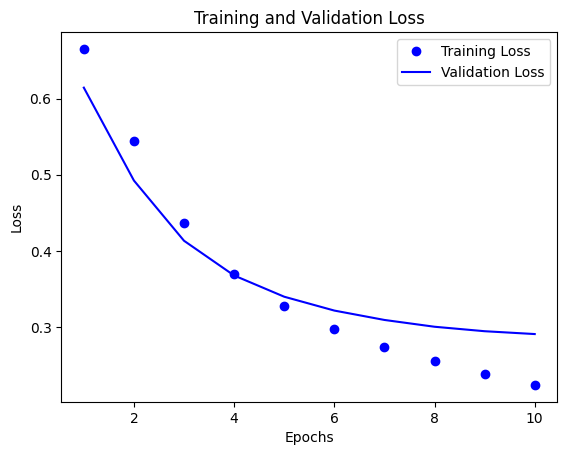

In [33]:
acc = history_dict["binary_accuracy"]
val_acc = history_dict["val_binary_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]


epochs = range(1,len(acc)+1)

# "bo" is for "blue dot"
plt.plot(epochs,loss,"bo",label = "Training Loss")
# "b" is for "solid blue line"
plt.plot(epochs,val_loss,"b",label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

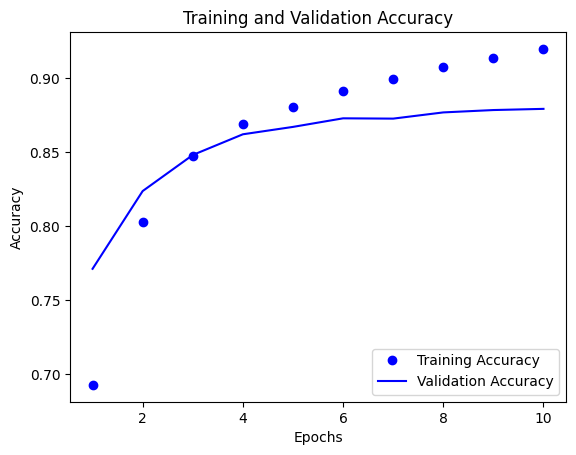

In [36]:
# Doğruluk için çizelim

plt.plot(epochs,acc,"bo",label = "Training Accuracy")
plt.plot(epochs,val_acc,"b",label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.show()

Doğrulama kaybı ve doğrulama doğruluğu eğitim doğruluğundan önce zirveye ulaşıyor.Bu overfitting 'e bir örnektir.Bu yüzden train verilerinde daha önce görmediği verilere nazaran daha iyi bir performans gösterecektir.Bu noktadan sonra model aşırı optimizasyon yapar ve test verilerine genelleme yapmayan,eğtim verilerine özgü temsiller öğrenir

Bu sorunu engellemek için validation accuracy artık artmadığında eğitimi durdurmak overfitting i önleyebilir.Bunun içinde tf.keras.callbacks.EarlyStopping kullanılmalıdır.

In [19]:
# # EarlyStopping Kullanarak gözlemleyelim
# # model eğitimi
# epochs = 10

# callback = tf.keras.callbacks.EarlyStopping(patience =3,monitor = "val_binary_accuracy") # patience : ardı ardına 3 epoch da değişim görünmezse durdur anlamına gelir.Monitor parametreside izlenecek takip edeceği değeri belirmemizi sağlar

# history = model.fit(
#     train_ds,
#     validation_data = val_ds,
#     epochs = epochs,
#     callbacks = [callback]
# )

Epoch 1/10
625/625 [==============================] - 9s 13ms/step - loss: 0.6630 - binary_accuracy: 0.6935 - val_loss: 0.6110 - val_binary_accuracy: 0.7728
Epoch 2/10
625/625 [==============================] - 4s 6ms/step - loss: 0.5417 - binary_accuracy: 0.8040 - val_loss: 0.4908 - val_binary_accuracy: 0.8248
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.4356 - binary_accuracy: 0.8489 - val_loss: 0.4124 - val_binary_accuracy: 0.8492
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3695 - binary_accuracy: 0.8700 - val_loss: 0.3673 - val_binary_accuracy: 0.8634
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 0.3272 - binary_accuracy: 0.8817 - val_loss: 0.3396 - val_binary_accuracy: 0.8698
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2969 - binary_accuracy: 0.8921 - val_loss: 0.3214 - val_binary_accuracy: 0.8732
Epoch 7/10
625/625 [==============================] - 4s 6ms/st

In [20]:
# # Tekrar kayıp ve doğruluklara bakalım
# loss , accuracy = model.evaluate(test_ds)

# print("Loss" ,loss)
# print("Accuracy:",accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.3084 - binary_accuracy: 0.8748
Loss 0.30841362476348877
Accuracy: 0.8748400211334229


EXPORT THE MODEL
*   Yukarıdaki modelde verileri modelde eğitmeden önce TextVectorization işleminden geçirdik.Bunu manuel olarak yaptık.Eğer ham verileri tahmin etmek istiyorsak bu textvectorization işlemini modele dahil etmemiz gerekiyor.

In [ ]:
# Modele Vectorize katmanı eklemek
# Bunun için eğittiğimiz modeldeki ağırlıkları kullanarak yeni model üretebiliriz

export_model = tf.keras.Sequential([
    vectorize_layer,
    model,
    layers.Activation("sigmoid")
])

export_model.compile(
    loss = losses.BinaryCrossentropy(from_logits = False),
    optimizer = "adam",
    metrics = ["accuracy"]
)

loss , accuracy = export_model.evaluate(raw_test_ds)
print("Accuracy" , accuracy)
print("Loss",loss)

In [24]:
# Yeni veriler üzerinden modelimizin tahminlerini alalım

examples = [
    "The movie was amazing!",
    "The movie unbelievable",
    "The Tron is awesome ",
    "The movie is terrible",
    "The oppenheimer movie was so bad"

]

export_model.predict(examples)

NOT(Önemli)!!! : TextVectorization katmanını modelin içinde ve dışında kullanmak arasında performans farkı vardır.
*  Dışında kullanmak GPU ' da eğitirken verileri eş zamansız CPU işlemesine ve ara belleğe alınmasını sağler.

*  Dolayısıyle model GPU üzerinden eğitilirken modeli geliştirmek ve en iyi performansı elde etmek için TextVectorizasyon katmanı model dışında kullanılır ve dağıtıma hazır olduğunda modele dahil edilir.